# Analysis of discussions related to PA 

In [3]:
from tqdm import tqdm
import pickle as pk
import pandas as pd
import numpy as np
from sklearn import preprocessing
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
path = "/Users/clem/Documents/Memoire"

In [4]:
fb_sentences = pd.read_csv(path + "/Data/Facebook/fb_all_sentences.tsv", sep = '\t', keep_default_na=False)

In [5]:
# Creating a column of sentences into token lists
#fb_sentences.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
#fb_sentences.drop_duplicates(inplace=True)
fb_sentences['sentence_str'] = fb_sentences['sentence_clean'].astype(str)

def split_sentence(sentence):
   return sentence.split()

fb_sentences['sentence_list'] = fb_sentences['sentence_str'].apply(split_sentence)

# From the whole dataset, creating a column being the number of sentences posted for each post 
grouped = fb_sentences.groupby('message_id')
fb_sentences['total_sentences'] = grouped['message_id'].transform('count')
fb_sentences.to_csv(path + "/Data/Facebook/fb_all_sentences.tsv", sep = '\t', index = False)

### 1. Filtering a dataset related to PA

We want to capture sentences containing key words of a relevant list related to Prime d'activité. 

For that, thanks to a Word2Vec embedding and SIF weights of the dataset, we look at the weighted embedding of prime + activite, and capture the top 100 closest words of the dataset to that embedding (thanks to cosinus similarity). We thus get a dictionnary of key words.

#### a. List of key words

Word2Vec model and SIF model :

In [6]:
# Load Word2Vec model
fb_model = Word2Vec.load(path + '/Data/Facebook/fb_model.model')

# Load vectors
word_vectors = fb_model.wv

# Load SIF file
with open(path + '/Data/Facebook/comments_sif_dict.pickle', 'rb') as pickle_file:
  sif_vec_dict = pk.load(pickle_file)

In [7]:
# Get SIF weights of each word
fb_sentences['tokens'] = fb_sentences['sentence_clean'].apply(lambda x: str(x).split())

word_count_dict = {}
for word, index in fb_model.wv.key_to_index.items():
    word_count_dict[word] = fb_model.wv.get_vecattr(word, "count")

print('Word frequencies computed.')

sif_dict = {}
for word, count in word_count_dict.items():
    sif_dict[word] = .001 / (.001 + count)

print('SIF dictionary built.')

# Weight of prime and activite
print(sif_dict['prime'])
print(sif_dict['activite'])


Word frequencies computed.
SIF dictionary built.
2.1331053470338423e-07
7.163318650917872e-07


List of 100 closest words to the embedding of prime + activite :

In [8]:
# Compute embedding for "prime + activité"
word1 = "prime"
word2 = "activite"

embedding = (0.5 * word_vectors[word1]) + (0.5 * word_vectors[word2])

# Find most similar words
similar_words = word_vectors.similar_by_vector(embedding,topn=150)

# similar_words = word_vectors.most_similar(positive = [embedding], topn=50)

# Extract the list of closest words
closest_words = [word for word, _ in similar_words]

print(closest_words)

['prime', 'activite', 'activiter', 'beneficiaire', 'exceptionnelle', 'interessemer', 'apl', 'smicard', 'imposable', 'aah', 'cotisation', 'remuneration', 'contrepartie', 'indemnite', 'salarier', 'caf', 'salaire', 'cdd', 'allocation', 'smic', 'defiscaliser', 'rsa', 'alloc', 'employeur', 'plafond', 'annuel', 'salarie', 'conversion', 'salair', 'pension', 'mensuel', 'augmentation', '100e', 'dividende', 'cessation', 'supplementaire', 'majorer', 'chomag', 'compenser', 'prestation', 'montant', 'revenu', 'versement', 'euro', 'verser', 'embauche', '200euro', 'revaloriser', 'defiscalisation', 'trimestre', 'bonus', 'compensation', 'revalorisation', 'activit', 'foyer', 'garantie', 'exoneration', 'habitation', 'invalidite', 'complementaire', 'cmu', 'indemnisation', 'bareme', 'retraire', 'plafonner', 'assurance', 'interimaire', 'majoration', 'cice', 'percevoir', 'succession', 'csg', 'licence', 'salarial', 'vieilless', 'smig', 'attribution', 'taux', 'retraite', 'chomage', 'cheque', 'energi', 'dotation

#### b. Filtered PA dataset

Selecting sentences containing word from the previous list of key words :

In [9]:
closest_words=['prime', 'activite', 'activiter', 'beneficiaire', 'exceptionnelle', 'interessemer', 'apl', 'smicard', 'imposable', 'aah', 'cotisation', 'remuneration', 'contrepartie', 'indemnite', 'salarier', 'caf', 'salaire', 'cdd', 'allocation', 'smic', 'defiscaliser', 'rsa', 'alloc', 'employeur', 'plafond', 'annuel', 'salarie', 'conversion', 'salair', 'pension', 'mensuel', 'augmentation', '100e', 'dividende', 'cessation', 'supplementaire', 'majorer', 'chomag', 'compenser', 'prestation', 'montant', 'revenu', 'versement', 'euro', 'verser', 'embauche', '200euro', 'revaloriser', 'defiscalisation', 'trimestre', 'bonus', 'compensation', 'revalorisation', 'activit', 'foyer', 'garantie', 'exoneration', 'habitation', 'invalidite', 'complementaire', 'cmu', 'indemnisation', 'bareme', 'retraire', 'plafonner', 'assurance', 'interimaire', 'majoration', 'cice', 'percevoir', 'succession', 'csg', 'licence', 'salarial', 'vieilless', 'smig', 'attribution', 'taux', 'retraite', 'chomage', 'cheque', 'energi', 'dotation', 'beneficier', 'simulation', 'chequ', 'mutuelle', 'emploie', 'emploi', 'sup', 'licencier', 'investissement', 'forfaitaire', 'precaire', 'licenciement', 'ressource', '100euro', 'axa', 'journalier', 'cdi', 'embaucher', 'reversion', 'contrat', 'epargne', 'rsi', 'imposition', 'aspa', 'employe', 'cumul', 'tarif', 'indemniter', 'complement', 'remboursement', 'consequent', 'contribution', 'quota', 'placement', 'conjoint', 'recette', 'prelevement', 'aide', '187', 'benefice', 'fourniture', 'familial', 'assedic', 'entreprise', '100', 'charge', 'subvention', 'travail', 'avantage', 'centime', 'entrepreneur', '300euros', 'reevaluer', 'rente', 'abonnement', 'organisme', 'taxe', 'verse', 'cotise', 'rentabilite', 'impacter', 'revenue', 'inflation', 'tva', 'reduction', 'rmi', 'entreprendre', '90e', '100e', '90euro']

In [10]:
index_act_bonus = []
sentences_act_bonus = []

for index, row in fb_sentences.iterrows():
    for word in closest_words :
        if word in row['sentence_list']:
            sentences_act_bonus.append(fb_sentences['sentence_list'][index])
            index_act_bonus.append(index)
print(len(sentences_act_bonus))

# Remove duplicates
index_act_bonus_final = list(set(index_act_bonus))
print(len(index_act_bonus_final))

157856
110560


Saving the PA filtered dataset :

In [11]:
fb_sentences_PA = fb_sentences.loc[index_act_bonus_final]
fb_sentences_PA.to_csv(path + '/Data/Facebook/fb_sentences_PA.tsv', sep = '\t', index = False)

In [12]:
# Add a column about being related to the PA or not in total dataset
fb_sentences['PA_related'] = 0
fb_sentences.loc[fb_sentences.index.isin(index_act_bonus_final), 'PA_related'] = 1
fb_sentences.to_csv(path + "/Data/Facebook/fb_all_sentences.tsv", sep = '\t', index = False)

### 2. Topic analysis of PA discussions

We do a Wordcloud analysis of that dataset to cluster into topics discussions about PA, to get intuition about what is at matter.

#### a. Preprocessing for Wordcloud


In [13]:
# Word2vec model for that PA filtered dataset
import time
import pandas as pd
import gensim
import gensim
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

window_size = 3
vector_size = 300
n_iterations= 100
n_workers = 1

df = pd.read_csv(path + '/Data/Facebook/fb_sentences_PA.tsv', sep='\t', keep_default_na=False)

stop_words = set(stopwords.words('french'))

df['sentence_clean'] = df['sentence_clean'].apply(lambda x: ' '.join([word for word in word_tokenize(str(x)) if word.lower() not in stop_words]))
df['sentence_clean'] = df['sentence_clean'].apply(lambda x: [word for word in str(x).split() if len(word) >= 2])
df['sentence_clean'] = df['sentence_clean'].apply(lambda x: ' '.join(x))
df.dropna(subset=['sentence_clean'], inplace=True)

corpus = list(df['sentence_clean'])
corpus = [str(sentence).split() for sentence in corpus]

t0 = time.time()
print('Training word embeddings...')
model = gensim.models.Word2Vec(
    sentences = corpus,
    vector_size=vector_size,
    window=window_size,
    min_count=5,
    workers=n_workers,
    epochs = n_iterations,
    seed = 123
)

model.save(path + "/Data/Facebook/model_PA_word.model")
df.to_csv(path + "/Data/Facebook/fb_sentences_PA.tsv",sep='\t', index=False)

print('Training word embeddings took:')
print(time.time() - t0)

[nltk_data] Downloading package punkt to /Users/clem/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/clem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training word embeddings...
Training word embeddings took:
353.077006816864


In [14]:
# SIF vectors and sentence embeddings for that PA filtered dataset
from tqdm import tqdm
import pickle as pk
import pandas as pd
import numpy as np
from sklearn import preprocessing
from gensim.models import Word2Vec

fb_model = Word2Vec.load(path + "/Data/Facebook/model_PA_word.model")

df = pd.read_csv(path + "/Data/Facebook/fb_sentences_PA.tsv", sep='\t', keep_default_na=False)

df['tokens'] = df['sentence_clean'].apply(lambda x: str(x).split())

word_count_dict = {}
for word, index in fb_model.wv.key_to_index.items():
    word_count_dict[word] = fb_model.wv.get_vecattr(word, "count")

print('Word frequencies computed.')

sif_dict = {}
for word, count in word_count_dict.items():
    sif_dict[word] = 0.001 / (0.001 + count)

print('SIF dictionary built.')

sif_vec_dict = {}

#  We put emphasis on sentences targeted on the PA
# important_words = ['prime', 'activite', 'activit', '100e', '90e', 'beneficiaire', 'caf', 'revalorisation']  # List of important words
important_words = ['prime', 'activite', 'activiter', 'beneficiaire', 'smic', 'caf', 'activit', '100e', '90e', 'mensuel', 'revaloriser', 'revalorisation', 'reevaluer', 'beneficier', '100euro', '90euro']
importance_factor = 10  # Importance factor for important words

def get_vector(tokens):
    sif_vec = np.mean(
        [sif_dict[one_token] * fb_model.wv[one_token] * importance_factor if one_token in important_words else sif_dict[one_token] * fb_model.wv[one_token] for one_token in tokens if one_token in fb_model.wv],
        axis=0)
    sif_vec = preprocessing.normalize(sif_vec.reshape(1, -1), norm="l2")
    return sif_vec

list_of_tokens = list(df['tokens'])

for k, tokens in tqdm(enumerate(list_of_tokens)):
    sif_vec_dict[k] = get_vector(tokens)

print("Document embeddings computed.")

with open(path + "/Data/Facebook/comments_sif_dict_PA_emph.pickle", 'wb') as outfile:
    pk.dump(sif_vec_dict, outfile)

Word frequencies computed.
SIF dictionary built.


110560it [00:31, 3550.38it/s]


Document embeddings computed.


In [15]:
len(sif_vec_dict)

110560

In [16]:
# Topic = cluster of embedded sentences. K-means clustering of the PA dataset
import random
import numpy as np
import pandas as pd
import pickle as pk
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

sample_size =  110560 # Size of the sample to train Kmeans
#sample_size = 100000 # Size of the sample to train Kmeans

with open(path + "/Data/Facebook/comments_sif_dict_PA_emph.pickle", 'rb') as pickle_file:
    sif_vec_dict = pk.load(pickle_file)

print("SIF dictionary loaded.")

fb_model = Word2Vec.load(path + "/Data/Facebook/model_PA_word.model")

print('Word embeddings loaded.')

myseed = 1234
random.seed(myseed)

keys = random.sample(list(sif_vec_dict.keys()), sample_size)
sample = {k : sif_vec_dict[k][0] for k in keys}

A = pd.DataFrame.from_dict(sample, orient = 'index')

print("Sample drawn.")

kmeans_models = []

K = [9,15,20]
for num_clusters in K:
    print('Clustering started for %s clusters.' %num_clusters)
    kmeans = KMeans(n_clusters=num_clusters,random_state=myseed,verbose=1).fit(A)
    kmeans_models.append(kmeans)
    print('Clustering done for %s clusters.' %num_clusters)

with open(path + '/Data/Facebook/kmeans_models_PA.pickle', 'wb') as outfile:
    pk.dump(kmeans_models, outfile)

def describe_topics(num_clusters, kmeans_models = kmeans_models):

    for model in kmeans_models:
        if len(model.cluster_centers_) == num_clusters:
            kmeans = model

    doc_clusters = kmeans.labels_.astype(np.float64)
    cluster_centers = kmeans.cluster_centers_.astype(np.float64)

    dict_topics = {}

    for i in range(num_clusters):
        top_closest_words = fb_model.wv.most_similar(positive=[cluster_centers[i]], topn=10)
        top_closest_words = [word[0] for word in top_closest_words]
        s = ', '
        top_closest_words = s.join(top_closest_words)
        dict_topics[str(i)] = top_closest_words

    table_of_topics = pd.DataFrame.from_dict(dict_topics, orient='index')
    table_of_topics.to_csv(path + '/Output/Tables/table_of_topics_PA_%s.tsv' %num_clusters, sep = '\t', index = True)

describe_topics(num_clusters = 9)
describe_topics(num_clusters = 15)
describe_topics(num_clusters = 20)

SIF dictionary loaded.
Word embeddings loaded.
Sample drawn.
Clustering started for 9 clusters.
Initialization complete
Iteration 0, inertia 176986.28125
Iteration 1, inertia 100004.90625
Iteration 2, inertia 99262.9609375
Iteration 3, inertia 98979.125
Iteration 4, inertia 98799.0625
Iteration 5, inertia 98675.125
Iteration 6, inertia 98559.3515625
Iteration 7, inertia 98503.6796875
Iteration 8, inertia 98473.671875
Iteration 9, inertia 98455.5859375
Iteration 10, inertia 98442.046875
Iteration 11, inertia 98428.375
Iteration 12, inertia 98417.734375
Iteration 13, inertia 98408.7421875
Iteration 14, inertia 98399.9609375
Iteration 15, inertia 98393.109375
Iteration 16, inertia 98389.1328125
Iteration 17, inertia 98384.9140625
Iteration 18, inertia 98380.375
Iteration 19, inertia 98376.453125
Iteration 20, inertia 98372.8203125
Iteration 21, inertia 98369.109375
Iteration 22, inertia 98366.8828125
Iteration 23, inertia 98365.84375
Iteration 24, inertia 98364.4609375
Iteration 25, inert

#### b. Wordcloud analysis

In [17]:
# from PIL import Image,ImageDraw,ImageFont
import numpy as np
import pandas as pd
import string
import pickle as pk
from tqdm import tqdm
import gensim.downloader as api
from gensim.models import Word2Vec, TfidfModel
from gensim.corpora import Dictionary
from wordcloud import WordCloud

num_clusters = 15

with open(path + "/Data/Facebook/comments_sif_dict_PA_emph.pickle", 'rb') as pickle_file:
  sif_vec_dict = pk.load(pickle_file)

print("SIF dictionary loaded.")

with open(path + "/Data/Facebook/kmeans_models_PA.pickle", 'rb') as pickle_file:
  kmeans_models = pk.load(pickle_file)

print('Kmeans models loaded.')

fb_model = Word2Vec.load(path + "/Data/Facebook/model_PA_word.model")

print('Word embeddings loaded.')

df = pd.read_csv(path + "/Data/Facebook/fb_sentences_PA.tsv", sep='\t')

for model in kmeans_models:
    if len(model.cluster_centers_) == num_clusters:
        kmeans = model

doc_clusters = kmeans.labels_.astype(np.float64)
cluster_centers = kmeans.cluster_centers_.astype(np.float64)

print('Predicting topics out of sample...')

assigned_clusters = []

for row in tqdm(range(len(df['message_id']))):
    assigned_cluster = kmeans.predict(sif_vec_dict[row])[0]
    assigned_clusters.append(assigned_cluster)

distances_to_centroid = []

for row in tqdm(range(len(df['message_id']))):
    distance_to_centroids = kmeans.transform(sif_vec_dict[row])**2
    distance_to_centroid = distance_to_centroids[0][assigned_clusters[row]]
    distances_to_centroid.append(distance_to_centroid)

df['cluster'] = assigned_clusters
df['distance_to_centroid'] = distances_to_centroid

dict_topics = {}

for i in range(num_clusters):
    top_closest_words = fb_model.wv.most_similar(positive=[cluster_centers[i]], topn=10)
    top_closest_words = [word[0] for word in top_closest_words]
    s = ', '
    top_closest_words = s.join(top_closest_words)
    dict_topics[str(i)] = top_closest_words

for i in range(num_clusters):
    top_closest_words = fb_model.wv.most_similar(positive=[cluster_centers[i]], topn=10)
    top_closest_words = [word[0] for word in top_closest_words]
    s = ', '
    top_closest_words = s.join(top_closest_words)
    dict_topics[str(i)] = top_closest_words
    df.loc[df['cluster'] == i, 'topic_label'] = top_closest_words

corpus = []

for cluster in range(num_clusters):
    messages_in_cluster = ' '.join(list(df.loc[df['cluster'] == cluster, 'sentence_clean'].dropna()))
    messages_in_cluster = str(messages_in_cluster).split()
    corpus.append(messages_in_cluster)

dct = Dictionary(corpus)
corpus = [dct.doc2bow(messages) for messages in corpus]
model = TfidfModel(corpus)

SIF dictionary loaded.
Kmeans models loaded.
Word embeddings loaded.
Predicting topics out of sample...


100%|██████████| 110560/110560 [00:37<00:00, 2950.06it/s]


In [18]:
for cluster in range(num_clusters):
    tf_idf_dtm = model[corpus[cluster]]
    top_words = sorted(tf_idf_dtm, key=lambda x: x[1], reverse=True)[0:50]
    top_words = ' '.join([dct[i] for i,j in top_words])
    df.loc[df['cluster'] == cluster, 'topic_label_tf_idf'] = top_words
    print(top_words)

# Manually label topics
df['topic_manual_label'] = ''
df['topic_manual_label'][df['cluster'] == 0] = '0'
df['topic_manual_label'][df['cluster'] == 1] = '1'
df['topic_manual_label'][df['cluster'] == 2] = '2'
df['topic_manual_label'][df['cluster'] == 3] = '3'
df['topic_manual_label'][df['cluster'] == 4] = '4'
df['topic_manual_label'][df['cluster'] == 5] = '5'
df['topic_manual_label'][df['cluster'] == 6] = '6'
df['topic_manual_label'][df['cluster'] == 7] = '7'
df['topic_manual_label'][df['cluster'] == 8] = '8'
df['topic_manual_label'][df['cluster'] == 9] = '9'
df['topic_manual_label'][df['cluster'] == 10] = '10'
df['topic_manual_label'][df['cluster'] == 11] = '11'
df['topic_manual_label'][df['cluster'] == 12] = '12'
df['topic_manual_label'][df['cluster'] == 13] = '13'
df['topic_manual_label'][df['cluster'] == 14] = '14'
#df['topic_manual_label'][df['cluster'] == 15] = '15'
#df['topic_manual_label'][df['cluster'] == 16] = '16'
#df['topic_manual_label'][df['cluster'] == 17] = '17'
#df['topic_manual_label'][df['cluster'] == 18] = '18'
#df['topic_manual_label'][df['cluster'] == 19] = '19'

for cluster in range(num_clusters):
    topic_manual_label = list(set(df["topic_manual_label"][df['cluster'] == cluster]))[0]
    tf_idf_dtm = model[corpus[cluster]]
    top_words = sorted(tf_idf_dtm, key=lambda x: x[1], reverse=True)[0:40]
    top_words = [(dct[i],j) for i,j in top_words]
    top_words = pd.DataFrame.from_records(top_words, columns=['key', 'val'])
    print(top_words)
    top_words = top_words.set_index('key')
    top_words = top_words['val']
    WordCloud(background_color="white", max_words=50, width=800, height=400).generate_from_frequencies(top_words).to_file(path + '/Output/Topics/wordcloud_PA_%s.png' %topic_manual_label)

juridictionnel rmiste parcours soignant spectaculaire payee convenable assistant fragile mobilite ephad 30ans scolarite 4eme conger surcharger interimaire monoparental fermeture beneficier ramer bailleur insensible medico postuler dependant penibilite penible radier accidente bossant demenagement fleuriste ameliore descent ehpad intermittent infirmiere 65ans confortablemer emplacement esat rtt demenager pol chercheur diplomer chomeurs maternel banlieue
1000x100 ingrid giraud priscilla gourault damien durand laura cnews julie chris amandine colette natacha cauchy chenais lydie xavier hanner praud vero 150e berger jo bigard christelle rider cc dupont laetitia hanouna claudine clouer dubois maryse muselier celine rodriguez annie gruel mathieu christine henry pascale simon lea drouet francoi baptiste delaere
mensuel 88 640 759000 840 1450 550 crg 1150 1050 1210 350 16000 720 420 440 630 1350 1999 2200 480 4200 830 340 580 650 1100 dollar 2600 41 950 9000 5500 820 2400 260 850 780 711 2100 

/var/folders/c1/c29fpvws6xn3j81txnc2_k100000gq/T/ipykernel_34460/3867065910.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topic_manual_label'][df['cluster'] == 0] = '0'
/var/folders/c1/c29fpvws6xn3j81txnc2_k100000gq/T/ipykernel_34460/3867065910.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topic_manual_label'][df['cluster'] == 1] = '1'
/var/folders/c1/c29fpvws6xn3j81txnc2_k100000gq/T/ipykernel_34460/3867065910.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

               key       val
0   juridictionnel  0.144156
1           rmiste  0.091762
2         parcours  0.085884
3         soignant  0.085314
4    spectaculaire  0.082084
5            payee  0.081872
6       convenable  0.080679
7        assistant  0.080577
8          fragile  0.076136
9         mobilite  0.075474
10           ephad  0.073297
11           30ans  0.072775
12       scolarite  0.072078
13            4eme  0.068285
14          conger  0.068285
15      surcharger  0.066736
16     interimaire  0.066517
17    monoparental  0.065667
18       fermeture  0.063447
19      beneficier  0.062270
20           ramer  0.060195
21        bailleur  0.059970
22      insensible  0.059970
23          medico  0.059970
24        postuler  0.059970
25       dependant  0.059130
26      penibilite  0.059130
27         penible  0.057256
28          radier  0.056904
29       accidente  0.056059
30         bossant  0.056059
31    demenagement  0.056059
32       fleuriste  0.056059
33        amel

In [19]:
import pandas as pd
from wordcloud import WordCloud

# Create a dictionary to store the unique top words across clusters
unique_top_words = {}

for cluster in range(num_clusters):
    tf_idf_dtm = model[corpus[cluster]]
    top_words = sorted(tf_idf_dtm, key=lambda x: x[1], reverse=True)[:50]
    
    for i, j in top_words:
        word = dct[i]
        if word not in unique_top_words:
            unique_top_words[word] = (j, cluster)
        else:
            val, prev_cluster = unique_top_words[word]
            if j > val:
                unique_top_words[word] = (j, cluster)
            elif j == val and cluster < prev_cluster:
                unique_top_words[word] = (j, cluster)

# Update the topic labels in the dataframe
df['topic_label_tf_idf'] = ''
for cluster in range(num_clusters):
    top_words = [word for word, (val, c) in unique_top_words.items() if c == cluster]
    top_words = ' '.join(top_words)
    df.loc[df['cluster'] == cluster, 'topic_label_tf_idf'] = top_words

# Manually label topics
df['topic_manual_label'] = df['cluster'].astype(str)

# Generate word cloud for each cluster
for cluster in range(num_clusters):
    topic_manual_label = str(cluster)
    top_words = [word for word, (val, c) in unique_top_words.items() if c == cluster]
    top_words_val = [val for word, (val, c) in unique_top_words.items() if c == cluster]
    
    # Create a dataframe from the top_words and top_words_val lists
    top_words_df = pd.DataFrame({'key': top_words, 'val': top_words_val})
    top_words_df = top_words_df.sort_values(by='val', ascending=False)[:50]
    print((top_words_df[:20]))
    
    # Generate word cloud and save it to a file
    wordcloud = WordCloud(background_color="white", max_words=50, width=800, height=400)
    wordcloud.generate_from_frequencies(top_words_df.set_index('key')['val'])
    wordcloud.to_file(path + '/Output/Topics/wordcloud_PA_%s.png' % topic_manual_label)

               key       val
0   juridictionnel  0.144156
1           rmiste  0.091762
2         parcours  0.085884
3         soignant  0.085314
4    spectaculaire  0.082084
5            payee  0.081872
6       convenable  0.080679
7        assistant  0.080577
8          fragile  0.076136
9         mobilite  0.075474
10           ephad  0.073297
11           30ans  0.072775
12       scolarite  0.072078
14          conger  0.068285
13            4eme  0.068285
15      surcharger  0.066736
16     interimaire  0.066517
17    monoparental  0.065667
18       fermeture  0.063447
19      beneficier  0.062270
          key       val
0    1000x100  0.079659
1      ingrid  0.076702
2      giraud  0.074973
3   priscilla  0.074973
4    gourault  0.070287
5      damien  0.069729
6      durand  0.069729
7       laura  0.069729
8       cnews  0.069621
9       julie  0.066325
10      chris  0.064052
12    colette  0.062756
11   amandine  0.062756
13    natacha  0.060916
14     cauchy  0.059270
15    c

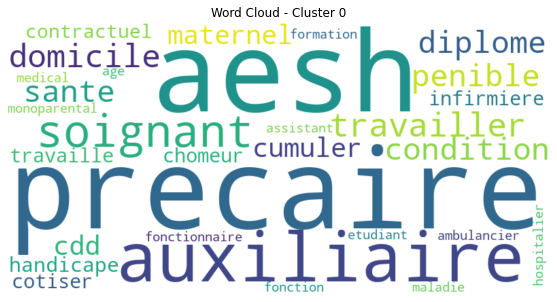

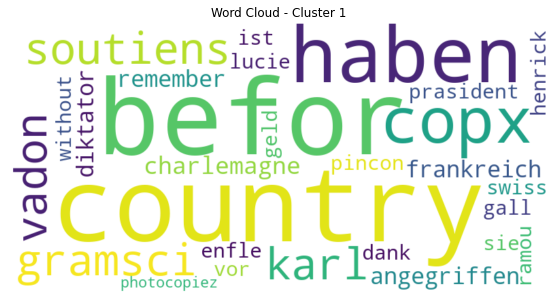

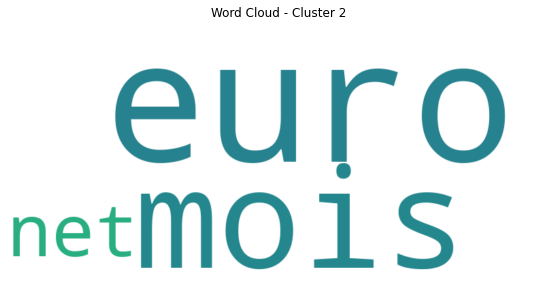

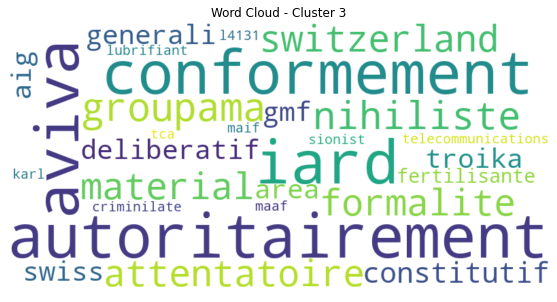

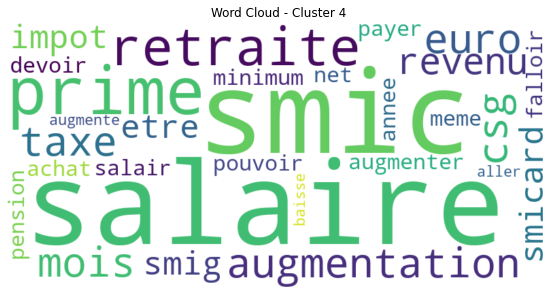

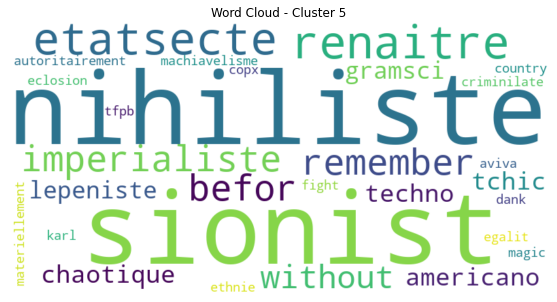

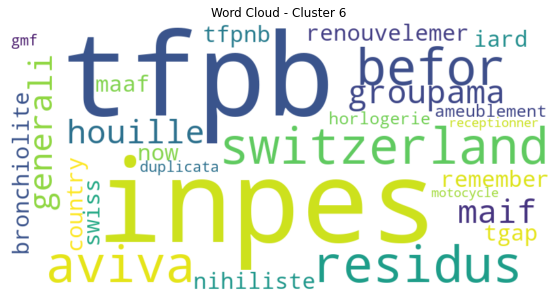

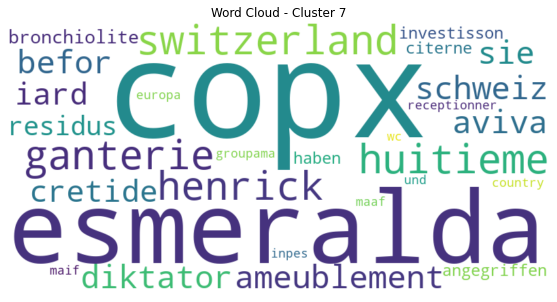

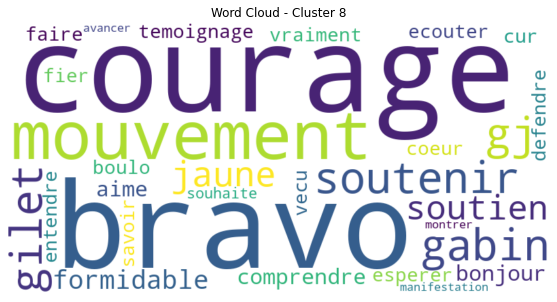

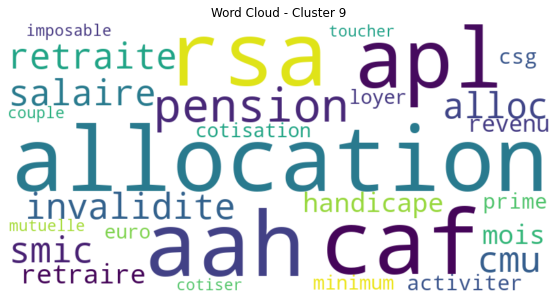

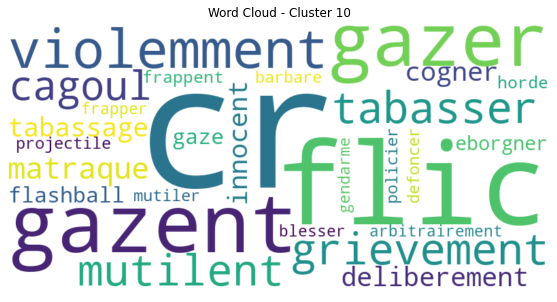

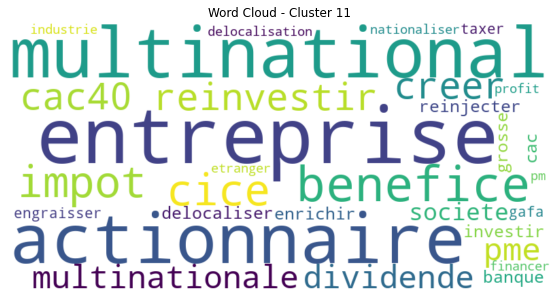

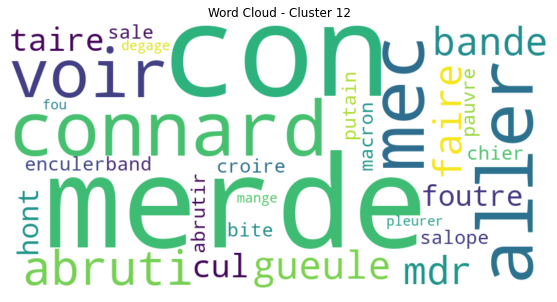

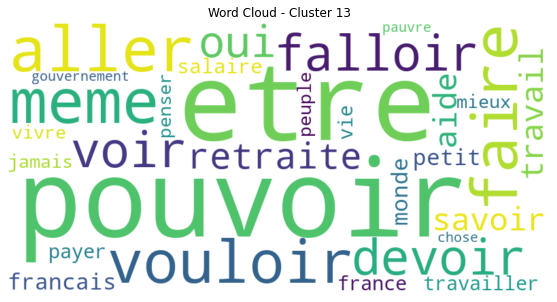

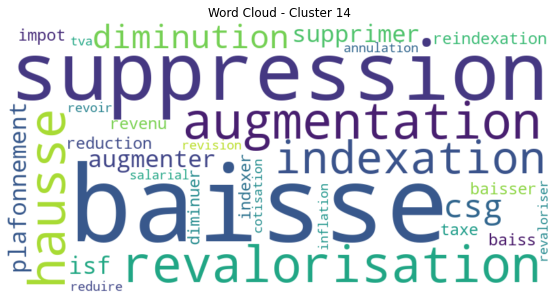

In [20]:
from wordcloud import WordCloud

def generate_word_cloud(cluster_id, cluster_words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - Cluster {}'.format(cluster_id))
    plt.show()

def describe_topics(num_clusters, kmeans_models=kmeans_models):
    for model in kmeans_models:
        if len(model.cluster_centers_) == num_clusters:
            kmeans = model

    doc_clusters = kmeans.labels_.astype(np.float64)
    cluster_centers = kmeans.cluster_centers_.astype(np.float64)

    dict_topics = {}

    for i in range(num_clusters):
        top_closest_words = fb_model.wv.most_similar(positive=[cluster_centers[i]], topn=30)
        top_closest_words = [word[0] for word in top_closest_words]
        s = ', '
        top_closest_words = s.join(top_closest_words)
        dict_topics[str(i)] = top_closest_words
        
        # Generate word cloud for each cluster
        generate_word_cloud(i, top_closest_words)

    table_of_topics = pd.DataFrame.from_dict(dict_topics, orient='index')
    table_of_topics.to_csv(path + '/Output/Tables/table_of_topics_PA_{}.tsv'.format(num_clusters), sep='\t', index=True)

describe_topics(num_clusters=15)

### 3. Frequency and visibility of PA discussions

In [69]:
fb_sentences_PA = pd.read_csv(path + "/Data/Facebook/fb_sentences_PA.tsv", sep='\t', keep_default_na=False)
#fb_sentences = pd.read_csv(path + "/Data/Facebook/fb_all_sentences.tsv", sep='\t', keep_default_na=False)

#### a. Frequency of PA comments

In [70]:
# Reformate date
fb_sentences_PA['date'] = pd.to_datetime(fb_sentences_PA['date'])
fb_sentences_PA['restrict_date'] = fb_sentences_PA['date'].dt.date
fb_sentences_PA['restrict_date'] = pd.to_datetime(fb_sentences_PA['restrict_date'])

Frequency of sentences (comments+posts) posted :

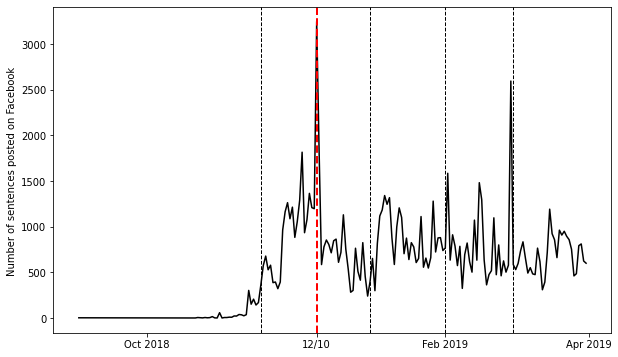

In [71]:
count_sent_by_date = fb_sentences_PA['restrict_date'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(count_sent_by_date.index, count_sent_by_date.values, color ='black')
ax1.set_ylabel('Number of sentences posted on Facebook ', color='black')


xticks = ['2018-10-01', '2018-12-10', '2019-02-01', '2019-04-01']
ax1.set_xticks(xticks)

xticklabels = ["Oct 2018", "12/10", "Feb 2019", "Apr 2019"]
ax1.set_xticklabels(xticklabels)

ax1.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax1.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)


plt.savefig(path + '/Output/Graphs/PA_dataset/PA_FBsentences.png')

Frequency of messages (posts) posted:

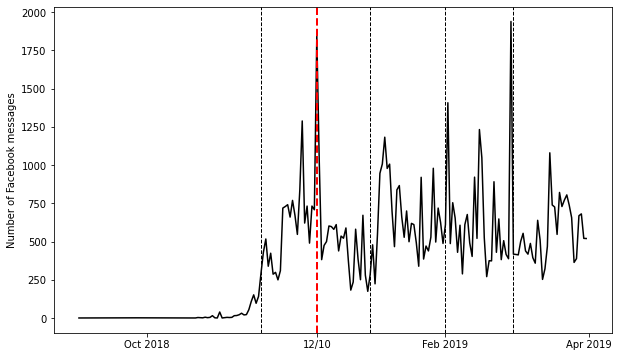

In [72]:
count_msg_by_date = fb_sentences_PA.groupby('restrict_date')['message_id'].nunique()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(count_msg_by_date.index, count_msg_by_date.values, color ='black')
ax1.set_ylabel('Number of Facebook messages', color='black')

xticks = ['2018-10-01', '2018-12-10', '2019-02-01', '2019-04-01']
ax1.set_xticks(xticks)

xticklabels = ["Oct 2018", "12/10", "Feb 2019", "Apr 2019"]
ax1.set_xticklabels(xticklabels)

ax1.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax1.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)


plt.savefig(path + '/Output/Graphs/PA_dataset/PA_FBmessages.png')

Most used words:

In [73]:
fb_sentences_PA_concat = ' '.join((fb_sentences_PA['sentence_clean'].astype(str)).tolist())
fb_sentences_PA_concat = fb_sentences_PA_concat.split()

from nltk.probability import FreqDist
word_freq = FreqDist(fb_sentences_PA_concat)
print(word_freq.most_common(50))

[('etre', 78412), ('faire', 20409), ('euro', 18269), ('travail', 14278), ('pouvoir', 13374), ('retraite', 12926), ('aller', 11556), ('taxe', 11079), ('salaire', 9665), ('falloir', 7791), ('payer', 7511), ('aide', 7445), ('meme', 7106), ('gilet', 7090), ('jaune', 7017), ('voir', 6512), ('devoir', 6162), ('100', 5970), ('france', 5763), ('mois', 5496), ('vouloir', 5241), ('an', 5007), ('macron', 4862), ('prime', 4688), ('entreprise', 4681), ('augmentation', 4567), ('francais', 4249), ('petit', 4186), ('prendre', 4137), ('smic', 4106), ('charge', 4102), ('impot', 4045), ('vie', 4041), ('mettre', 3992), ('gouvernement', 3929), ('social', 3728), ('emploi', 3713), ('savoir', 3711), ('peuple', 3686), ('droit', 3508), ('oui', 3499), ('grand', 3396), ('pays', 3241), ('monde', 3202), ('argent', 3112), ('vivre', 3089), ('etat', 3063), ('revenu', 2950), ('avantage', 2860), ('jour', 2848)]


#### b. Visibility of PA discussions compared to other discussions

We measure visibility through :
- Post visibility : the number of comments to that post
- Comments visibility : the "ranking" of the comments (ordered by Facebook, so giving less or more visibility of some comments compared to other under the post)

1. Mean visibility of PA posts compared to the total dataset:

In [74]:
# Reformate date for the total dataset
fb_sentences['date'] = pd.to_datetime(fb_sentences['date'])
fb_sentences['restrict_date'] = fb_sentences['date'].dt.date
fb_sentences['restrict_date'] = pd.to_datetime(fb_sentences['restrict_date'])

# From the whole dataset, creating a column being the number of sentences posted for each post :
grouped = fb_sentences.groupby('message_id')
fb_sentences['total_sentences'] = grouped['message_id'].transform('count')

In [75]:
mean_visibility_pa = fb_sentences[fb_sentences['PA_related'] == 1].groupby('message_id')['total_sentences'].mean()
mean_visibility_total = fb_sentences.groupby('message_id')['total_sentences'].mean()

overall_mean_visibility_pa = mean_visibility_pa.mean()
overall_mean_visibility_total = mean_visibility_total.mean()

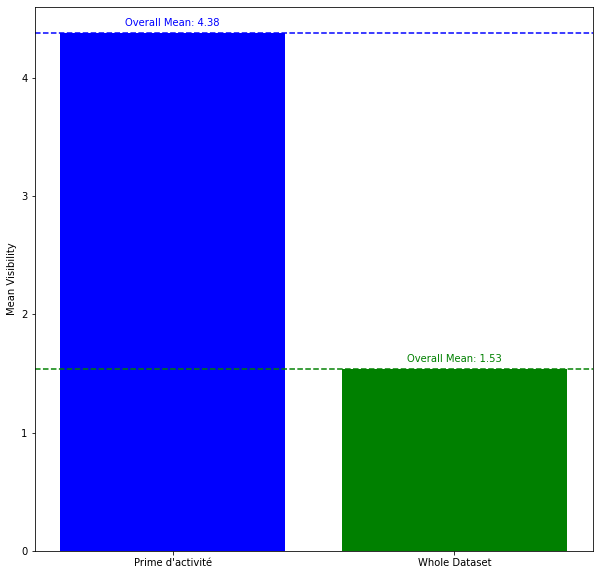

In [76]:
import matplotlib.pyplot as plt

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the mean visibility for sentences related to "prime d'activité"
ax.bar('Prime d\'activité', mean_visibility_pa.mean(), color='blue')

# Plot the mean visibility for the whole dataset
ax.bar('Whole Dataset', mean_visibility_total.mean(), color='green')

# Add labels and title
ax.set_ylabel('Mean Visibility')
plt.xticks()

# Add horizontal line for overall mean visibility
ax.axhline(y=overall_mean_visibility_pa, color='blue', linestyle='--')
ax.axhline(y=overall_mean_visibility_total, color='green', linestyle='--')

# Add text annotation for overall mean visibility
ax.annotate(f'Overall Mean: {overall_mean_visibility_pa:.2f}',
             xy=('Prime d\'activité', overall_mean_visibility_pa),
             xytext=(0, 5),
             textcoords='offset points',
             ha='center',
             va='bottom',
             color='blue')

ax.annotate(f'Overall Mean: {overall_mean_visibility_total:.2f}',
             xy=('Whole Dataset', overall_mean_visibility_total),
             xytext=(0, 5),
             textcoords='offset points',
             ha='center',
             va='bottom',
             color='green')

# Display the plot
plt.savefig(path + '/Output/Graphs/PA_dataset/mean_visibility_pa.png')

2. Visibility over time of PA posts compared to the total dataset:

In [77]:
post_data = fb_sentences[fb_sentences['type'] == 'post']

# Group by restrict_date and calculate mean visibility for PA-related and total sentences
mean_visibility_pa = post_data[post_data['PA_related'] == 1].groupby(pd.Grouper(key='restrict_date', freq='W'))['total_sentences'].mean()
mean_visibility_total = post_data.groupby(pd.Grouper(key='restrict_date', freq='W'))['total_sentences'].mean()

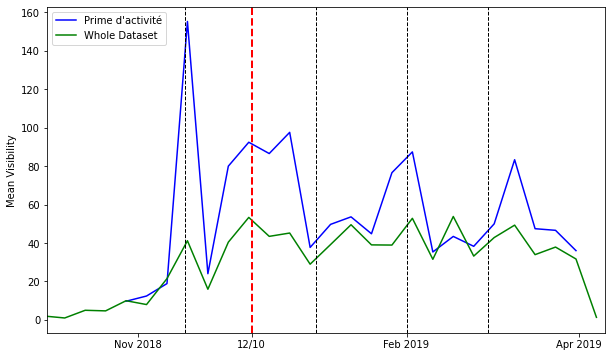

In [78]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean visibility for sentences related to "prime d'activité"
ax.plot(mean_visibility_pa.index, mean_visibility_pa.values, color='blue', label='Prime d\'activité')

# Plot the mean visibility for the whole dataset
ax.plot(mean_visibility_total.index, mean_visibility_total.values, color='green', label='Whole Dataset')

# Add labels and title
ax.set_ylabel('Mean Visibility')
plt.xticks()

start_date = pd.to_datetime('2018-10-01')
end_date = pd.to_datetime('2019-04-10')
ax.set_xlim(start_date, end_date)


xticks = ['2018-11-01', '2018-12-10', '2019-02-01', '2019-04-01']
ax.set_xticks(xticks)

xticklabels = ["Nov 2018", "12/10", "Feb 2019", "Apr 2019"]
ax.set_xticklabels(xticklabels)

ax.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)

# Add legend
ax.legend()

# Display the plot
plt.savefig(path + '/Output/Graphs/PA_dataset/mean_visibility_pa_time.png')

3. Mean visibility "ranking" of PA comments compared to the total dataset:

In [79]:
fb_sentences['rank_prop'] = 1 - fb_sentences['sentence_id']/fb_sentences['total_sentences']

mean_rank_pa = fb_sentences[fb_sentences['PA_related'] == 1].groupby('message_id')['rank_prop'].mean()
mean_rank_total = fb_sentences.groupby('message_id')['rank_prop'].mean()

overall_mean_rank_pa = mean_rank_pa.mean()
overall_mean_rank_total = mean_rank_total.mean()

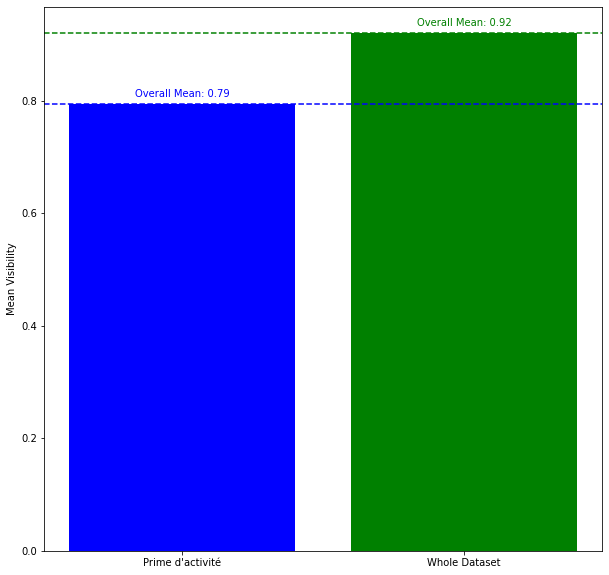

In [80]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the mean visibility for sentences related to "prime d'activité"
ax.bar('Prime d\'activité', mean_rank_pa.mean(), color='blue')

# Plot the mean visibility for the whole dataset
ax.bar('Whole Dataset', mean_rank_total.mean(), color='green')

# Add labels and title
ax.set_ylabel('Mean Visibility')
plt.xticks()

# Add horizontal line for overall mean visibility
ax.axhline(y=overall_mean_rank_pa, color='blue', linestyle='--')
ax.axhline(y=overall_mean_rank_total, color='green', linestyle='--')

# Add text annotation for overall mean visibility
ax.annotate(f'Overall Mean: {overall_mean_rank_pa:.2f}',
             xy=('Prime d\'activité', overall_mean_rank_pa),
             xytext=(0, 5),
             textcoords='offset points',
             ha='center',
             va='bottom',
             color='blue')

ax.annotate(f'Overall Mean: {overall_mean_rank_total:.2f}',
             xy=('Whole Dataset', overall_mean_rank_total),
             xytext=(0, 5),
             textcoords='offset points',
             ha='center',
             va='bottom',
             color='green')


# Display the plot
plt.savefig(path + '/Output/Graphs/PA_dataset/mean_rank_pa.png')

4. Visibility over time of "ranking" of PA comments compared to the total dataset:

In [81]:
post_data = fb_sentences[fb_sentences['type'] == 'post']
# Group by restrict_date and calculate mean visibility for PA-related and total sentences
mean_rank_pa = post_data[post_data['PA_related'] == 1].groupby(pd.Grouper(key='restrict_date', freq='W'))['rank_prop'].mean()
mean_rank_total = post_data.groupby(pd.Grouper(key='restrict_date', freq='W'))['rank_prop'].mean()

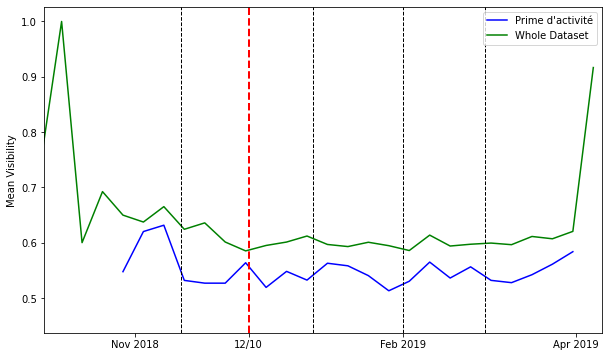

In [82]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean visibility for sentences related to "prime d'activité"
ax.plot(mean_rank_pa.index, mean_rank_pa.values, color='blue', label='Prime d\'activité')

# Plot the mean visibility for the whole dataset
ax.plot(mean_rank_total.index, mean_rank_total.values, color='green', label='Whole Dataset')

# Add labels and title
ax.set_ylabel('Mean Visibility')
plt.xticks()

start_date = pd.to_datetime('2018-10-01')
end_date = pd.to_datetime('2019-04-10')
ax.set_xlim(start_date, end_date)



xticks = ['2018-11-01', '2018-12-10', '2019-02-01', '2019-04-01']
ax.set_xticks(xticks)

xticklabels = ["Nov 2018", "12/10", "Feb 2019", "Apr 2019"]
ax.set_xticklabels(xticklabels)

ax.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)

# Add legend
ax.legend()

# Display the plot
plt.savefig(path + '/Output/Graphs/PA_dataset/mean_rank_pa_time.png')

### 4. Sentiment analysis of PA discussions

In [83]:
from tqdm import tqdm
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [84]:
print('Measuring sentiment in the Facebook corpus...')

senti_list_textblob = []

for i in tqdm(list(fb_sentences_PA["sentence_clean"])):
    vs = tb(i).sentiment[0]
    senti_list_textblob.append(vs)
        
fb_sentences_PA["sentiment_textblob"]=senti_list_textblob

senti_list_vader = []

for i in tqdm(list(fb_sentences_PA["sentence_clean"])):
    vs = vader.polarity_scores(i)['compound']
    senti_list_vader.append(vs)
        
fb_sentences_PA["sentiment_vader"]=senti_list_vader

print("Correlation between the two measures: %s" %fb_sentences_PA['sentiment_textblob'].corr(fb_sentences_PA['sentiment_vader']))

fb_sentences_PA.to_csv(path + '/Data/Facebook/fb_sentences_PA.tsv',  sep = '\t', index = False)
fb_sentences_PA = pd.read_csv(path + "/Data/Facebook/fb_sentences_PA.tsv",  sep = '\t', keep_default_na=False)

Measuring sentiment in the Facebook corpus...


100%|██████████| 110560/110560 [00:24<00:00, 4582.42it/s]


Correlation between the two measures: 0.2688114217980837


Sentiment polarity over time:

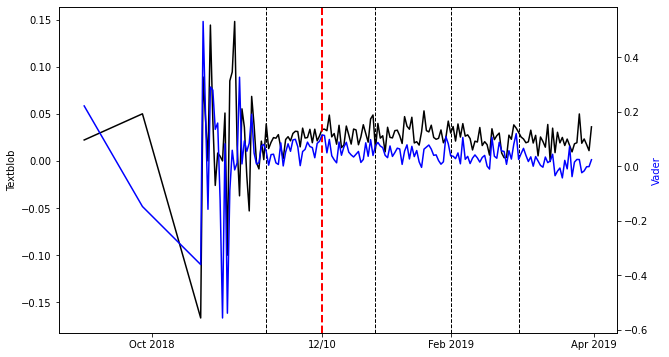

In [85]:
fb_sentences_PA['restrict_date'] = pd.to_datetime(fb_sentences_PA['restrict_date'])
mean_score_vader_by_date = fb_sentences_PA.groupby('restrict_date')['sentiment_vader'].mean()
mean_score_blob_by_date = fb_sentences_PA.groupby('restrict_date')['sentiment_textblob'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(mean_score_blob_by_date.index, mean_score_blob_by_date.values, color ='black')

ax.set_ylabel('Mean Visibility')
plt.xticks()

start_date = pd.to_datetime('2018-10-01')
end_date = pd.to_datetime('2019-04-10')
ax.set_xlim(start_date, end_date)

ax1.set_ylabel('Textblob', color='black')
xticks = ['2018-10-01', '2018-12-10', '2019-02-01', '2019-04-01']
ax1.set_xticks(xticks)

xticklabels = ["Oct 2018", "12/10", "Feb 2019", "Apr 2019"]
ax1.set_xticklabels(xticklabels)


ax1.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax1.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)

ax2 = ax1.twinx()

# Plot the second variable on the right axis
ax2.plot(mean_score_vader_by_date.index, mean_score_vader_by_date.values, color='blue')
ax2.set_ylabel('Vader', color='blue')
ax2.tick_params(axis='y', labelcolor='black')

# plt.title('Measure of sentiment polarity')
plt.savefig(path + '/Output/Graphs/PA_dataset/sent_polarity.png')

Aggregated per week:

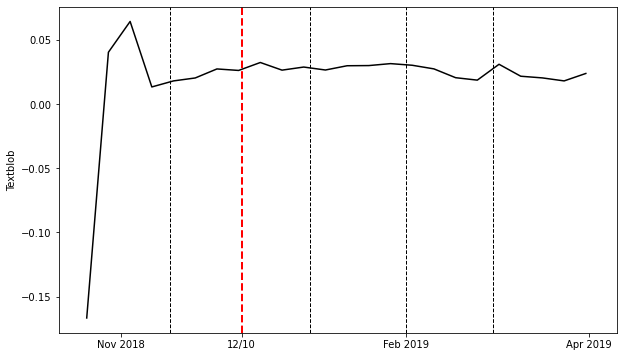

In [86]:
# Aggregating data per week to have less noisy signal : 
fb_sentences_PA['restrict_date'] = pd.to_datetime(fb_sentences_PA['restrict_date'])
mean_score_vader_by_week = fb_sentences_PA.groupby(pd.Grouper(key='restrict_date', freq='W'))['sentiment_vader'].mean()
mean_score_blob_by_week = fb_sentences_PA.groupby(pd.Grouper(key='restrict_date', freq='W'))['sentiment_textblob'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(mean_score_blob_by_week.index, mean_score_blob_by_week.values, color ='black')

ax1.set_ylabel('Textblob', color='black')
xticks = ['2018-11-01', '2018-12-10', '2019-02-01', '2019-04-01']
ax1.set_xticks(xticks)

xticklabels = ["Nov 2018", "12/10", "Feb 2019", "Apr 2019"]
ax1.set_xticklabels(xticklabels)

ax1.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax1.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)


# Plot the second variable on the right axis
ax2.plot(mean_score_vader_by_week.index, mean_score_vader_by_week.values, color='blue')
ax2.set_ylabel('Vader', color='blue')
ax2.tick_params(axis='y', labelcolor='black')

start_date = pd.to_datetime('2018-10-12')
end_date = pd.to_datetime('2019-04-10')
ax1.set_xlim(start_date, end_date)
ax2.set_xlim(start_date, end_date)

# plt.title('Measure of sentiment polarity')
plt.savefig(path + '/Output/Graphs/PA_dataset/sent_polarity_week.png')

Sentiment polarity and sentences posted over time:

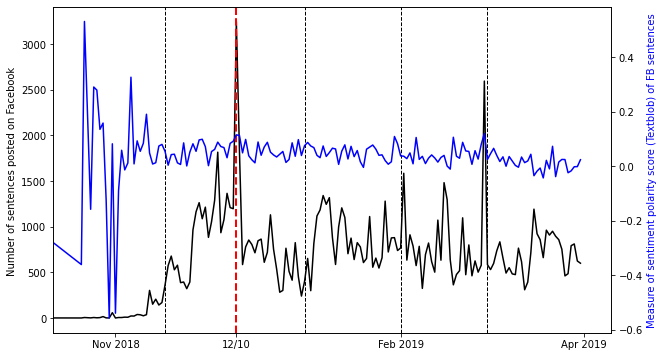

In [87]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(count_sent_by_date.index, count_sent_by_date.values, color ='black')

ax1.set_ylabel('Number of sentences posted on Facebook ', color='black')
xticks = ['2018-11-01', '2018-12-10', '2019-02-01', '2019-04-01']
ax1.set_xticks(xticks)

xticklabels = ["Nov 2018", "12/10", "Feb 2019", "Apr 2019"]
ax1.set_xticklabels(xticklabels)

ax1.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax1.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)

ax2 = ax1.twinx()

# Plot the second variable on the right axis
ax2.plot(mean_score_vader_by_date.index, mean_score_vader_by_date.values, color='blue')
ax2.set_ylabel('Measure of sentiment polarity score (Textblob) of FB sentences', color='blue')
ax2.tick_params(axis='y', labelcolor='black')

start_date = pd.to_datetime('2018-10-12')
end_date = pd.to_datetime('2019-04-10')
ax1.set_xlim(start_date, end_date)
ax2.set_xlim(start_date, end_date)

plt.savefig(path + '/Output/Graphs/PA_dataset/FBsentences_polarity_freq.png')

Aggregated per week:

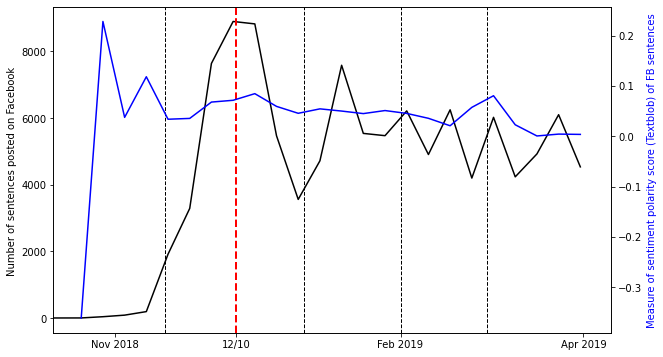

In [88]:
# Aggregating data per week to have less noisy signal : 
count_sent_by_week = fb_sentences_PA.groupby(pd.Grouper(key='restrict_date', freq='W')).size()
count_msg_by_week = fb_sentences_PA.groupby(pd.Grouper(key='restrict_date', freq='W'))['message_id'].nunique()
count_msg_by_week = count_msg_by_week[6:]
mean_score_blob_by_week = mean_score_blob_by_week[5:]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(count_sent_by_week.index, count_sent_by_week.values, color ='black')

ax1.set_ylabel('Number of sentences posted on Facebook ', color='black')
xticks = ['2018-11-01', '2018-12-10', '2019-02-01', '2019-04-01']
ax1.set_xticks(xticks)

xticklabels = ["Nov 2018", "12/10", "Feb 2019", "Apr 2019"]
ax1.set_xticklabels(xticklabels)

ax1.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax1.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)

ax2 = ax1.twinx()

# Plot the second variable on the right axis
ax2.plot(mean_score_vader_by_week.index, mean_score_vader_by_week.values, color='blue')
ax2.set_ylabel('Measure of sentiment polarity score (Textblob) of FB sentences', color='blue')
#ax2.tick_params(axis='y', labelcolor='black')

start_date = pd.to_datetime('2018-10-12')
end_date = pd.to_datetime('2019-04-10')
ax1.set_xlim(start_date, end_date)
ax2.set_xlim(start_date, end_date)

plt.savefig(path + '/Output/Graphs/PA_dataset/FBsent_polarity_freq_week.png')

#### b. Sentiment analysis taking visibility into account

Weighting polarity with visibility, according to 2 previous measures + the multiplication of both.

In [90]:
# Weighting by number of answers to the post (post visibility)
grouped_data_mess_visibility = fb_sentences_PA.groupby(pd.Grouper(key='restrict_date', freq='W')).apply(lambda x: np.average(x['sentiment_vader'], weights=x['total_sentences']) if x['total_sentences'].sum() != 0 else np.nan).reset_index(name='weighted_mean_sentiment')

# Weighting by visibility of answers to the post (sentences visibility)
fb_sentences_PA['visibility_rank'] = fb_sentences_PA.groupby('message_id').cumcount()
fb_sentences_PA['visibility_rank'] += 1
grouped_data_sent_visibility = fb_sentences_PA.groupby(pd.Grouper(key='restrict_date', freq='W')).apply(lambda x: np.average(x['sentiment_vader'], weights=x['visibility_rank']) if x['visibility_rank'].sum() != 0 else np.nan).reset_index(name='weighted_mean_sentiment')

# Weighting by both
fb_sentences_PA['sentence_weight'] = fb_sentences_PA['total_sentences'] * fb_sentences_PA['visibility_rank']
grouped_data_both = fb_sentences_PA.groupby(pd.Grouper(key='restrict_date', freq='W')).apply(lambda x: np.average(x['sentiment_vader'], weights=x['sentence_weight']) if x['sentence_weight'].sum() != 0 else np.nan).reset_index(name='weighted_mean_sentiment')


Sentiment polarity over time weighted by 3 measures :

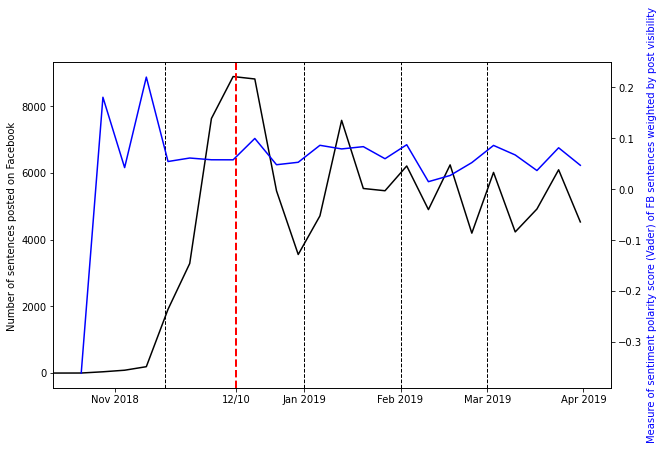

In [91]:
# Plot the weighted mean sentiment polarity for post visibility
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(count_sent_by_week.index, count_sent_by_week.values, color ='black')

ax1.set_ylabel('Number of sentences posted on Facebook ', color='black')
xticks = ['2018-11-01', '2018-12-10','2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01']
ax1.set_xticks(xticks)

xticklabels = ["Nov 2018", "12/10", "Jan 2019", "Feb 2019", "Mar 2019", "Apr 2019"]
ax1.set_xticklabels(xticklabels)

ax1.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax1.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)

ax2 = ax1.twinx()

ax2.plot(grouped_data_mess_visibility['restrict_date'], grouped_data_mess_visibility['weighted_mean_sentiment'], color='blue')
# Plot the second variable on the right axis
ax2.set_ylabel('Measure of sentiment polarity score (Vader) of FB sentences weighted by post visibility', color='blue')
ax2.tick_params(axis='y', labelcolor='black')

start_date = pd.to_datetime('2018-10-12')
end_date = pd.to_datetime('2019-04-10')
ax1.set_xlim(start_date, end_date)
ax2.set_xlim(start_date, end_date)

plt.savefig(path + '/Output/Graphs/PA_dataset/FBsent_polarity_freq_week_weighted_post.png')

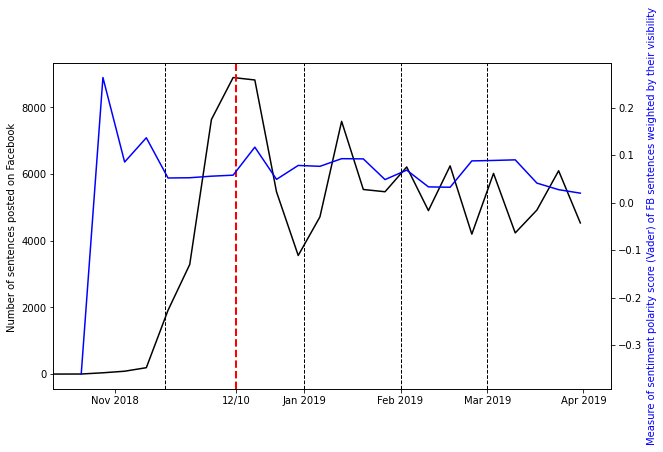

In [92]:
# Plot the weighted mean sentiment polarity for sentence visibility
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(count_sent_by_week.index, count_sent_by_week.values, color ='black')

ax1.set_ylabel('Number of sentences posted on Facebook ', color='black')
xticks = ['2018-11-01', '2018-12-10','2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01']
ax1.set_xticks(xticks)

xticklabels = ["Nov 2018", "12/10", "Jan 2019", "Feb 2019", "Mar 2019", "Apr 2019"]
ax1.set_xticklabels(xticklabels)

ax1.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax1.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)

ax2 = ax1.twinx()

ax2.plot(grouped_data_sent_visibility['restrict_date'], grouped_data_sent_visibility['weighted_mean_sentiment'], color='blue')
# Plot the second variable on the right axis
ax2.set_ylabel('Measure of sentiment polarity score (Vader) of FB sentences weighted by their visibility', color='blue')
ax2.tick_params(axis='y', labelcolor='black')

start_date = pd.to_datetime('2018-10-12')
end_date = pd.to_datetime('2019-04-10')
ax1.set_xlim(start_date, end_date)
ax2.set_xlim(start_date, end_date)

plt.savefig(path + '/Output/Graphs/PA_dataset/FBsent_polarity_freq_week_weighted_sent.png')

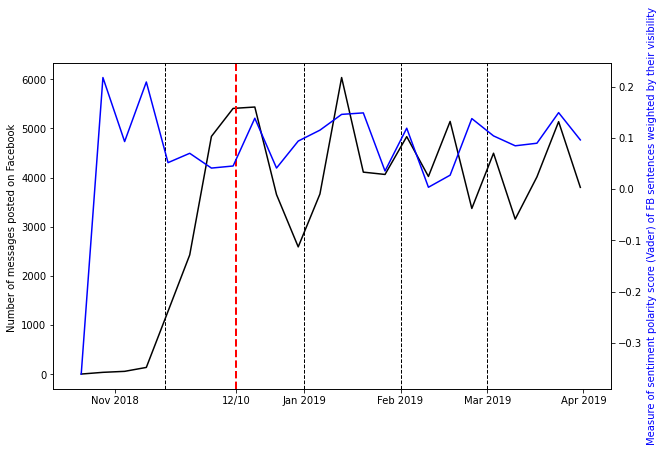

In [94]:
# Plot the weighted mean sentiment polarity for both weight
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(count_msg_by_week.index, count_msg_by_week.values, color ='black')

ax1.set_ylabel('Number of messages posted on Facebook ', color='black')
xticks = ['2018-11-01', '2018-12-10','2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01']
ax1.set_xticks(xticks)

xticklabels = ["Nov 2018", "12/10", "Jan 2019", "Feb 2019", "Mar 2019", "Apr 2019"]
ax1.set_xticklabels(xticklabels)

ax1.axvline(pd.to_datetime('2018-11-17'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2018-12-10'), color='red', linestyle='--', lw=2)
ax1.axvline(pd.to_datetime('2019-01-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-02-01'), color='black', linestyle='--', lw=1)
ax1.axvline(pd.to_datetime('2019-03-01'), color='black', linestyle='--', lw=1)

ax2 = ax1.twinx()

ax2.plot(grouped_data_both['restrict_date'], grouped_data_both['weighted_mean_sentiment'], color='blue')
# Plot the second variable on the right axis
ax2.set_ylabel('Measure of sentiment polarity score (Vader) of FB sentences weighted by their visibility', color='blue')
ax2.tick_params(axis='y', labelcolor='black')

start_date = pd.to_datetime('2018-10-12')
end_date = pd.to_datetime('2019-04-10')
ax1.set_xlim(start_date, end_date)
ax2.set_xlim(start_date, end_date)

plt.savefig(path + '/Output/Graphs/PA_dataset/FBsent_polarity_freq_week_weighted_both.png')